# SVMによるIrisデータセットの分類

このページでは、SVMによるIrisデータセットの分類を行っています。

## 注意事項

- 「Googleへのログインが必要」と出たら、自分のGoogleアカウントでログインします。

- 「警告: このノートブックは Google が作成したものではありません。」と出たら「このまま実行」をクリックします。

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



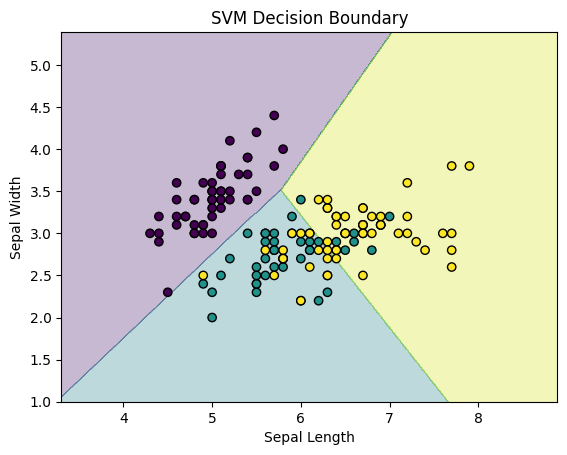

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. データセットの読み込み
iris = datasets.load_iris()
X = iris.data[:, :2]  # 特徴量（最初の2列を使用：がく片の長さと幅）
y = iris.target       # ラベル

# 2. データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. モデルの作成と学習
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # 線形カーネル
svm_model.fit(X_train, y_train)

# 4. テストデータで予測
y_pred = svm_model.predict(X_test)

# 5. 結果の表示
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. データと分類境界の可視化
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundaries(X, y, svm_model)
